<a href="https://colab.research.google.com/github/thrinnadhh/IMDB-sentiment-analysis-using-RNN-LSTM-/blob/main/IMDB_setiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
np.random.seed(7)

In [ ]:
topwords=6000
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=topwords)
##As the imdb dataset got sorted out based on the freq so we are taking the top 6000 words into consideration

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
25000


In [ ]:
print(len(X_test))

25000


In [ ]:
max(np.max(X_train))

5998

In [ ]:
##trucate and or pad input sequences
##It takes pre padding not the post padding
max_review_len=600
X_train=sequence.pad_sequences(X_train,maxlen=max_review_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_review_len)
print(X_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
##Create the model
model=Sequential()
##embedding
embedding_vector_length=32
##embedding(batch_size,output_length,input_length)
model.add(Embedding(topwords,embedding_vector_length,input_length=max_review_len))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.summary()
##params of LSTM are calculated using the formulae(mn+n^2+n)m=inputs,n=outputs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           192000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history=model.fit(X_train, Y_train, epochs=20, batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 20s 52ms/step - loss: 0.0588 - accuracy: 0.9799 - val_loss: 0.6546 - val_accuracy: 0.8456
Epoch 2/20
391/391 [==============================] - 20s 52ms/step - loss: 0.0541 - accuracy: 0.9841 - val_loss: 0.7330 - val_accuracy: 0.8486
Epoch 3/20
391/391 [==============================] - 22s 55ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.7811 - val_accuracy: 0.8302
Epoch 4/20
391/391 [==============================] - 20s 52ms/step - loss: 0.0590 - accuracy: 0.9792 - val_loss: 0.7728 - val_accuracy: 0.8517
Epoch 5/20
391/391 [==============================] - 16s 41ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.7930 - val_accuracy: 0.8434
Epoch 6/20
391/391 [==============================] - 16s 41ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.5908 - val_accuracy: 0.8261
Epoch 7/20
391/391 [==============================] - 16s 41ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.7276 - val_accuracy:

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=0)

In [ ]:
print('Test score:',score[0])
print('Test accuracy:',score[1])

Test score: 0.8578662276268005
Test accuracy: 0.8439199924468994


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.9799200296401978,
 0.9841200113296509,
 0.9886400103569031,
 0.9792400002479553,
 0.9909200072288513,
 0.9878000020980835,
 0.9853600263595581,
 0.9951199889183044,
 0.9950799942016602,
 0.9771199822425842,
 0.9965999722480774,
 0.9965199828147888,
 0.9914399981498718,
 0.9892799854278564,
 0.9967600107192993,
 0.9968799948692322,
 0.9963600039482117,
 0.9912400245666504,
 0.9950799942016602,
 0.9950000047683716]

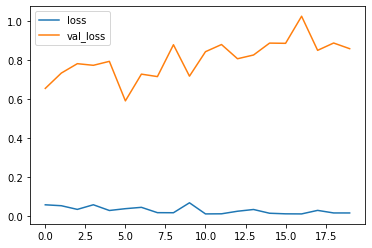

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(loc='best')
plt.show()

Upto epoch 9 the val_loss is decreasing on the epoch 10 the val_loss got increased to 5.However, on increasing the epochs the loss futher decreases.As optimizers is used to create the non_convex functions.So lets increase the epoch to 20 (assume)and observe the val_loss and loss.As number of epochs is of hyperparmeter.

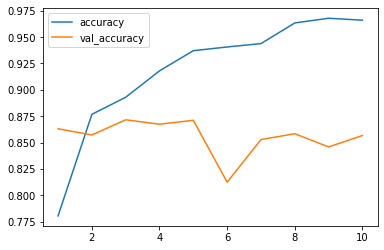

In [ ]:
plt.plot(range(1,11),history.history['accuracy'],label='accuracy')
plt.plot(range(1,11),history.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='best')
plt.show()

Not so accurate so lets add batch normalization and some droupouts

Dropouts+Batch Normallization+LSTM

In [ ]:
from keras.layers import BatchNormalization
model_B=Sequential()
model_B.add(Embedding(topwords,embedding_vector_length,input_length=max_review_len))
model_B.add(BatchNormalization())
model_B.add(LSTM(100))
model_B.add(Dense(1,activation='sigmoid'))
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           192000    
                                                                 
 batch_normalization (BatchN  (None, 600, 32)          128       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 245,429
Trainable params: 245,365
Non-trainable params: 64
_________________________________________________________________


In [ ]:
model_B.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history=model.fit(X_train,Y_train,epochs=10,steps_per_epoch=128,validation_data=(X_test,Y_test))

Epoch 1/10
128/128 [==============================] - 12s 92ms/step - loss: 0.0629 - accuracy: 0.9798 - val_loss: 0.5583 - val_accuracy: 0.8576
Epoch 2/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0421 - accuracy: 0.9882 - val_loss: 0.6533 - val_accuracy: 0.8554
Epoch 3/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0314 - accuracy: 0.9923 - val_loss: 0.6897 - val_accuracy: 0.8530
Epoch 4/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0346 - accuracy: 0.9906 - val_loss: 0.7078 - val_accuracy: 0.8561
Epoch 5/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0275 - accuracy: 0.9934 - val_loss: 0.8371 - val_accuracy: 0.8503
Epoch 6/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0330 - accuracy: 0.9912 - val_loss: 0.8010 - val_accuracy: 0.8355
Epoch 7/10
128/128 [==============================] - 12s 91ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.7857 - val_accuracy:

In [ ]:
score=model.evaluate(X_test,Y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.7539 - accuracy: 0.8441


In [ ]:
score

[0.753912627696991, 0.8441200256347656]

In [ ]:
print("Test score:",score[0])
print("Test accuracy",score[1])

Test score: 0.753912627696991
Test accuracy 0.8441200256347656


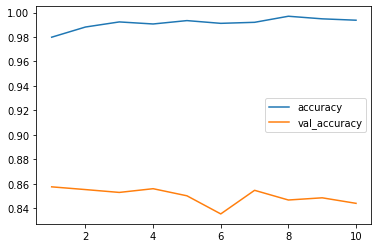

In [ ]:
plt.plot(range(1,11),history.history['accuracy'],label='accuracy')
plt.plot(range(1,11),history.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='best')
plt.show()


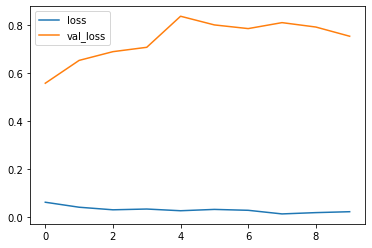

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(loc='best')
plt.show()

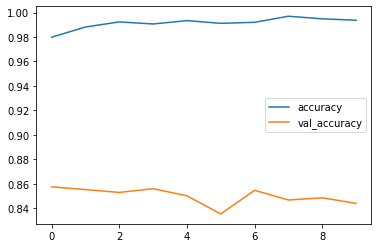

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='best')
plt.show()

As even though they accuracy and val_accuracy look a part but they are providing the best accuracy as the y_scaling is more deep classified it looks like that....

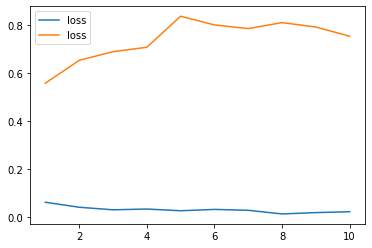

In [ ]:
plt.plot(range(1,11),history.history['loss'],label='loss')
plt.plot(range(1,11),history.history['val_loss'],label='loss')
plt.legend(loc='best')
plt.show()